In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme()

In [2]:
df = pd.read_csv('/content/drive/MyDrive/mipt/python/churn.csv')

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
# Небольшой препроцессинг данных
df = df.drop('RowNumber', axis=1)
df['CustomerId'] = df['CustomerId'].astype(dtype='int32')
df['CreditScore'] = df['CreditScore'].astype(dtype='int16')
df['Geography'] = df['Geography'].astype(dtype='category')
df['Gender'] = df['Gender'].astype(dtype='category')
df['Age'] = df['Age'].astype(dtype='int8')
df['Tenure'] = df['Tenure'].astype(dtype='int8')
df['NumOfProducts'] = df['NumOfProducts'].astype(dtype='int8')
df['HasCrCard'] = df['HasCrCard'].astype(dtype='int8')
df['IsActiveMember'] = df['IsActiveMember'].astype(dtype='int8')
df['Exited'] = df['Exited'].astype(dtype='int8')

#### 1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

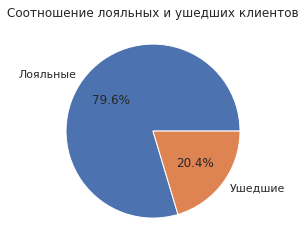

In [4]:
plt.pie(
    x=df['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%'
)
plt.title('Соотношение лояльных и ушедших клиентов')
plt.show()

Соотношение лояльных/ушедших клиентов 80/20, каждый пятый клиент не отвечает лояльностью банку

#### 2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

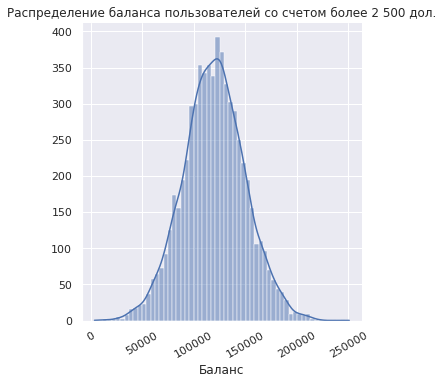

In [5]:
sns.displot(
    x=df[df['Balance'] > 2500]['Balance'],
    kde=True
)
plt.title('Распределение баланса пользователей со счетом более 2 500 дол.')
# plt.axvline(x=df[df['Balance'] > 2500]['Balance'].mean(), color='red', linestyle='--',)
plt.xlabel('Баланс')
plt.ylabel('')
plt.xticks(rotation=30)
plt.show()

Распределение имеет ярко выраженную колоколообразную форму, характерную для нормального распределения, cреднее значение близко к медианному и находится в районе 120 000 дол.

#### 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

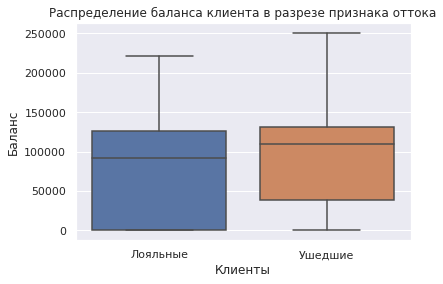

In [6]:
sns.boxplot(
    x=df['Exited'],
    y=df['Balance']
)
plt.title('Распределение баланса клиента в разрезе признака оттока')
plt.xlabel('Клиенты')
plt.ylabel('Баланс')
plt.xticks(ticks=[0, 1], labels=['Лояльные', 'Ушедшие'])
plt.show()

Медианное значение баланса ушедших клиентов выше, чем у лояльных, то же верно в отношении максимальной суммы на счёте. В целом, можно сделать вывод о том, что банк покидают премиальные или более обеспеченные клиенты. Вероятно, это связано с качеством обслуживания, отсутствием премиальных программ и тарифов для обеспеченных клиентов, приватных зон обслуживания и проч.

#### 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

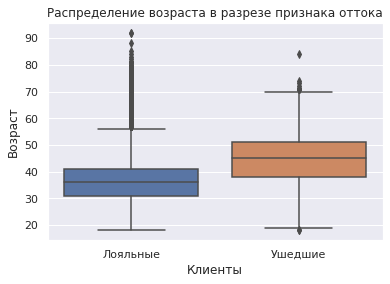

In [7]:
sns.boxplot(
    x=df['Exited'],
    y=df['Age'],
)
plt.title('Распределение возраста в разрезе признака оттока')
plt.xlabel('Клиенты')
plt.ylabel('Возраст')
plt.xticks(ticks=[0, 1], labels=['Лояльные', 'Ушедшие'])
plt.show()

Потеницальных выбросов больше в группе лояльных клиентов банка. Из графика видно, что банк теряет клиентов в возрасте от 38 до 51 года, именно на эту возрастную категорию с медианным значением 45 лет банку стоит обратить внимание.

#### 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

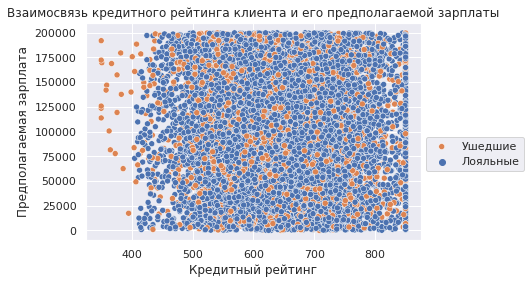

In [8]:
sns.scatterplot(
    x=df['CreditScore'],
    y=df['EstimatedSalary'],
    hue=df['Exited'],
    legend=['Лояльные', 'Ушедшие']
)
plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.legend(['Ушедшие', 'Лояльные'], bbox_to_anchor=(1, 0.5))
plt.show()

Явной взаимосвязи между кредитным рейтингом и преполагаемой зарплатой не видно, однако можно обратить внимание на то, что у ушедших клиентов кредитный рейтинг ниже, чем у лояльных клиентов банка.

#### 6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

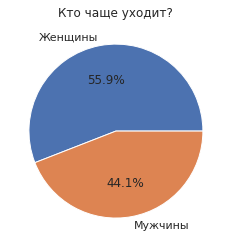

In [9]:
plt.pie(
    x=df[df['Exited'] == 1]['Gender'].value_counts(),
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%'
)
plt.title('Кто чаще уходит?')
plt.show()

Из круговой диаграммы мы видим, что чаще уходят женщины.

#### 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

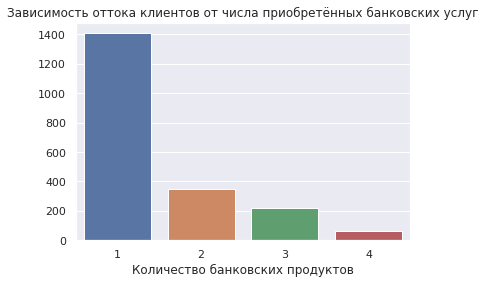

In [10]:
grouped = df.groupby('NumOfProducts', as_index=False)['Exited'].sum()
sns.barplot(
    data=grouped,
    x='NumOfProducts',
    y='Exited',
)
plt.title('Зависимость оттока клиентов от числа приобретённых банковских услуг')
plt.xlabel('Количество банковских продуктов')
plt.ylabel('')
plt.show()

Отток клиентов от числа приобретённых банковских продукт имеет обратную зависимость: чем больше количество приобретённых продуктов, тем меньше отток клиентов.

#### 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

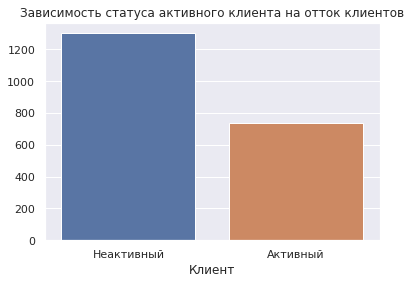

In [11]:
grouped = df.groupby('IsActiveMember', as_index=False)['Exited'].sum()
sns.barplot(
    data=grouped,
    x='IsActiveMember',
    y='Exited'
)
plt.title('Зависимость статуса активного клиента на отток клиентов')
plt.xlabel('Клиент')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['Неактивный', 'Активный'])
plt.show()

Как мы видим, активные клиенты уходят реже. Разумным предложением банку для уменьшения оттока среди неактивных клиентов было бы повышение их активности, например, путём вовлечения в разработку и последующее использование новых продуктов банка, приглашение их друзей и семьи, в том числе детей, и проч.

#### 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [12]:
fig = px.choropleth(
    data_frame=df,
    locations='Geography',
    locationmode = 'country names',
    color='Exited'
)
fig.show()

В Германии доля ушедших клиентов выше. Возможно, это связано с возрастным критерием: среднее и медианное значения возраста клиентов банка в Германии выше, чем в других странах. Также это может быть связано с более высокими зарплатами по сравнению с другими странами. Или же клиенты банков в Германии менее активны.

#### 10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat - категории кредитного рейтинга.

In [13]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return 'Very_Poor'
    elif credit_score >= 500 and credit_score < 601:
        return 'Poor'
    elif credit_score >= 601 and credit_score < 661:
        return 'Fair'
    elif credit_score >= 661 and credit_score < 781:
        return 'Good'
    elif credit_score >= 781 and credit_score < 851:
        return 'Excellent'
    elif credit_score >= 851:
        return 'Top'
    elif credit_score < 300:
        return 'Deep'

df['CreditScoreCat'] = df['CreditScore'].apply(func=get_credit_score_cat).astype(dtype='category')

#### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами - количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) - доля ушедших пользователей.
#### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [14]:
pivot_df = df.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean'
)

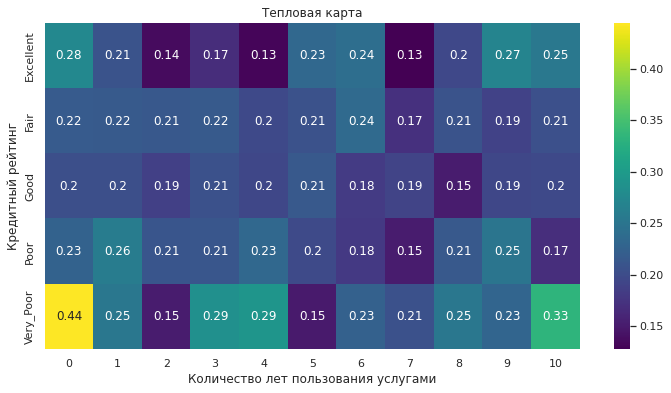

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    data=pivot_df,
    annot=True,
    cmap='viridis'
)
plt.title('Тепловая карта')
plt.xlabel('Количество лет пользования услугами')
plt.ylabel('Кредитный рейтинг')
plt.show()

Наиболее часто уходят клиенты с очень плохим кредитным рейтингом практически независимо от количества лет пользования услугами банка. На втором месте клиенты с отличным кредитным рейтингом, что является довольно странным, и, скорее всего, связано с отсутствием специальных продуктов и программ банка для таких клиентов.